In [267]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [268]:
df1 = pd.read_csv('hr_employee_churn_data.csv')

Feature Engineering

In [269]:
df2 = df1.copy()

In [270]:
df2.drop(['empid'],axis=1,inplace=True)

In [271]:
df2.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,salary,left
0,0.38,0.53,2,157,3,0,0,low,1
1,0.80,0.86,5,262,6,0,0,medium,1
2,0.11,0.88,7,272,4,0,0,medium,1
3,0.72,0.87,5,223,5,0,0,low,1
4,0.37,0.52,2,159,3,0,0,low,1


In [272]:
#handle missing values
df2.isnull().sum()

satisfaction_level       2
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
promotion_last_5years    0
salary                   0
left                     0
dtype: int64

In [273]:
df2['satisfaction_level'].describe()

count    14997.000000
mean         0.612863
std          0.248634
min          0.090000
25%          0.440000
50%          0.640000
75%          0.820000
max          1.000000
Name: satisfaction_level, dtype: float64

In [274]:
df2['satisfaction_level'].fillna(df2['satisfaction_level'].mean(), inplace=True)

In [275]:
df2.isnull().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
promotion_last_5years    0
salary                   0
left                     0
dtype: int64

In [276]:
#handle categorical features..salary using get dummies
df2['salary'].unique()

array(['low', 'medium', 'high'], dtype=object)

In [277]:
salary_dummies = pd.get_dummies(df2['salary'],drop_first=True)

In [278]:
salary_dummies

,low,medium
0,True,False
1,False,True
2,False,True
3,True,False
4,True,False
...,...,...
14994,True,False
14995,True,False
14996,True,False
14997,True,False


In [279]:
df2=pd.concat([df2,salary_dummies],axis=1)

In [280]:
df2.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,salary,left,low,medium
0,0.38,0.53,2,157,3,0,0,low,1,True,False
1,0.80,0.86,5,262,6,0,0,medium,1,False,True
2,0.11,0.88,7,272,4,0,0,medium,1,False,True
3,0.72,0.87,5,223,5,0,0,low,1,True,False
4,0.37,0.52,2,159,3,0,0,low,1,True,False


In [281]:
#drop salary feature as we already applied lable endcoding tech
df2.drop(['salary'],axis=1,inplace=True)

In [282]:

df2.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,left,low,medium
0,0.38,0.53,2,157,3,0,0,1,True,False
1,0.80,0.86,5,262,6,0,0,1,False,True
2,0.11,0.88,7,272,4,0,0,1,False,True
3,0.72,0.87,5,223,5,0,0,1,True,False
4,0.37,0.52,2,159,3,0,0,1,True,False



Split Dataset into Training set and Test set

In [283]:
#split dataset into features and label
X= df2.drop(labels='left',axis=1)
y= df2['left']

In [284]:
#split dataset into train and test
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.2, random_state=0)

In [285]:
len(X_train)

11999

In [286]:
len(X_test)

3000

Model Selection

In [287]:
# use below two models that are RandomForestClassifier and XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn import linear_model
from sklearn import svm
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from scipy.stats import uniform, randint


In [288]:
model_param = {
    # 'RandomForestClassifier':{
    #     'model':RandomForestClassifier(),
    #     'param':{
    #         'n_estimators': [25, 50, 100, 150], 
    #         'max_features': ['sqrt', 'log2', None], 
    #         'max_depth': [3, 6, 9], 
    #         'max_leaf_nodes': [3, 6, 9]
            
            
    #     }
    # },
    # 'XGBClassifier':{
    #     'model':XGBClassifier(objective='binary:logistic'),
    #     'param':{
    #        'learning_rate': [0.5, 0.1, 0.01, 0.001],
    #         'max_depth': [3, 5, 10, 20],
    #         'n_estimators': [10, 50, 100, 200,300,400],
    #         'min_child_weight': [1, 5, 10],
    #         'gamma': [0.5, 1, 1.5, 2, 5],
    #         'subsample': [0.6, 0.8, 1.0],
    #         'colsample_bytree': [0.6, 0.8, 1.0],
    #     }
    # }
    # 'SVC':{
    #     'model':SVC(),
    #     'param':{
    #         'C': uniform(0.1, 1), 
    #         'gamma': uniform(0.01, 0.1),  
    #         'kernel': ['linear', 'rbf']  
    #     }
    #  }
    # 'LogisticRegression':{
    #     'model':LogisticRegression(),
    #     'param':{
    #         'C': [0.01, 0.1, 1, 10, 100,0.001],
    #         'penalty': ['l1', 'l2', 'elasticnet', 'none'],
    #         'solver': ['liblinear', 'saga', 'lbfgs', 'newton-cg', 'sag'],
    #         'max_iter': [100, 200, 300, 400, 500,1000]
    #     }
    # }
    'GaussianNB':{
        'model':GaussianNB(),
        'param':{
            'priors': [None, [0.1, 0.9], [0.9, 0.1]]
        }
    }
}

In [289]:
# from sklearn.model_selection import RandomizedSearchCV
# scores = []
# for model_name, mp in model_param.items():
#     model_selection = RandomizedSearchCV(estimator=mp['model'], param_distributions=mp['param'], cv=5, return_train_score=False)
#     model_selection.fit(X, y)
#     scores.append({
#         'model': model_name,
#         'best_score': model_selection.best_score_,
#         'best_params': model_selection.best_params_
#     })

from sklearn.model_selection import RandomizedSearchCV
scores = []
for model_name, mp in model_param.items():
    model_selection = RandomizedSearchCV(estimator=mp['model'], param_distributions=mp['param'], n_iter=20,scoring='accuracy', cv=5, 
                                         verbose=2,random_state=42,n_jobs=-1 )
    model_selection.fit(X=, y)
    scores.append({
        'model': model_name,
        'best_score': model_selection.best_score_,
        'best_params': model_selection.best_params_
    })

c:\Python311\Lib\site-packages\sklearn\model_selection\_search.py:318: UserWarning: The total space of parameters 3 is smaller than n_iter=20. Running 3 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Fitting 5 folds for each of 3 candidates, totalling 15 fits


In [290]:
scores

[{'model': 'GaussianNB',
  'best_score': 0.8159849949983327,
  'best_params': {'priors': [0.9, 0.1]}}]

Model Building 

#xgboost

In [291]:
#as per above results, xgboost gives best result and hence selecting same to model building...
import time
from sklearn.model_selection import cross_val_score, KFold
model_xgb= XGBClassifier(subsample= 0.6,n_estimators= 100,min_child_weight= 1,max_depth= 5,learning_rate= 0.1,gamma= 0.5,colsample_bytree= 1.0)
#reg = linear_model.LogisticRegression()


In [292]:


model_xgb.fit(X_train,y_train)
#reg.fit(X_train,y_train)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=1.0, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.5, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [293]:
#model_xgb.score(X_test,y_test)
predict = model_xgb.predict(X_test)
num_folds = 10
kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)
cross_val_results = cross_val_score(model_xgb, X_test, y_test, cv=kf)
   
print(f'Cross-Validation Results (Accuracy): {cross_val_results}')
print(f'Mean Accuracy: {cross_val_results.mean()}')

Cross-Validation Results (Accuracy): [0.96666667 0.96666667 0.98666667 0.98       0.97666667 0.98333333
 0.98666667 0.99       0.95333333 0.96333333]
Mean Accuracy: 0.9753333333333334


In [294]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, predict)

0.9793333333333333

In [295]:
from sklearn.metrics import confusion_matrix , precision_score, recall_score
confu_mat = confusion_matrix(y_test, predict)
print(confu_mat)

[[2285   14]
 [  48  653]]


In [296]:
precision = precision_score(y_test, predict)
recall = recall_score(y_test, predict)
print(precision)
print(recall)

0.9790104947526237
0.9315263908701854


In [297]:
from sklearn.metrics import f1_score, roc_curve, auc
f1 = f1_score(y_test, predict)
print(f1)

0.9546783625730995


0.9627183933472284


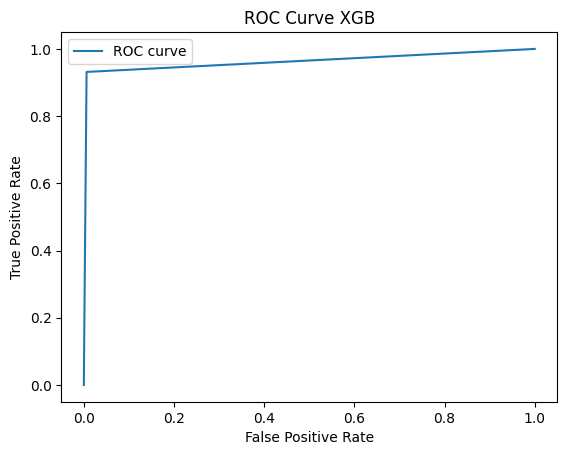

In [298]:
fpr, tpr, thresholds = roc_curve(y_test, predict)

# Calculate AUC
roc_auc = auc(fpr, tpr)
print(roc_auc)
plt.plot(fpr, tpr, label='ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve XGB')
plt.legend()
plt.show()

RANDOMFOREST

In [299]:
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import cross_val_score, KFold



lm2 = RandomForestClassifier(n_estimators= 100, max_leaf_nodes= 9, max_features= None, max_depth= 6).fit(X_train,y_train)

forest_pred = lm2.predict(X_test)

In [300]:
num_folds = 10
kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)
cross_val_results = cross_val_score(lm2, X_test, y_test, cv=kf)
   
print(f'Cross-Validation Results (Accuracy): {cross_val_results}')
print(f'Mean Accuracy: {cross_val_results.mean()}')
accuracy_score(y_test, forest_pred)

Cross-Validation Results (Accuracy): [0.95333333 0.96333333 0.97333333 0.97333333 0.96333333 0.98
 0.98       0.98       0.93666667 0.96      ]
Mean Accuracy: 0.9663333333333334


0.9693333333333334

In [301]:
from sklearn.metrics import f1_score, roc_curve, auc

In [302]:
f1 = f1_score(y_test, forest_pred)
print(f1)

0.9330422125181951


In [303]:
fpr1, tpr1, thresholds1 = roc_curve(y_test, forest_pred)

# Calculate AUC
roc_auc1 = auc(fpr1, tpr1)
print(roc_auc1)


0.9502444466644618


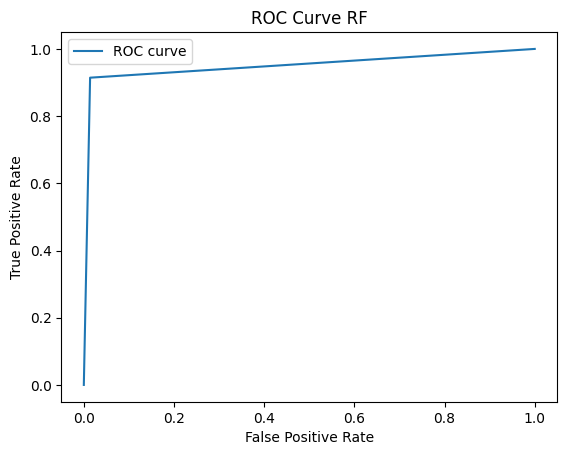

In [304]:
plt.plot(fpr1, tpr1, label='ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve RF')
plt.legend()
plt.show()

In [305]:
from sklearn.metrics import confusion_matrix , precision_score, recall_score
confu_mat = confusion_matrix(y_test, forest_pred)
print(confu_mat)

[[2267   32]
 [  60  641]]


In [306]:
precision1 = precision_score(y_test, forest_pred)
recall1 = recall_score(y_test, forest_pred)
print(precision1)
print(recall1)

0.9524517087667161
0.9144079885877318


SVM

In [307]:
from sklearn import svm

In [308]:
model = svm.SVC(C= 0.8796910002727693,
   gamma= 0.0696850157946487,
   kernel= 'rbf')

model.fit(X_train, y_train)


SVC(C=0.8796910002727693, gamma=0.0696850157946487)

In [309]:
SVC_pred = model.predict(X_test)
num_folds = 10
kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)
cross_val_results = cross_val_score(model, X_test, y_test, cv=kf)
   
print(f'Cross-Validation Results (Accuracy): {cross_val_results}')
print(f'Mean Accuracy: {cross_val_results.mean()}')
SVC_pred

Cross-Validation Results (Accuracy): [0.93666667 0.94       0.94666667 0.95666667 0.92333333 0.93666667
 0.93666667 0.94666667 0.91666667 0.92333333]
Mean Accuracy: 0.9363333333333334


array([1, 0, 0, ..., 1, 0, 0], dtype=int64)

In [310]:
accuracy_score(y_test, SVC_pred)


0.956

In [311]:
from sklearn.metrics import f1_score, roc_curve, auc
f1 = f1_score(y_test, SVC_pred)
print(f1)



0.9067796610169492


In [312]:
fpr2, tpr2, thresholds2 = roc_curve(y_test, SVC_pred)

#Calculate AUC
roc_auc2 = auc(fpr2, tpr2)
print(roc_auc2)

0.9420407930260567


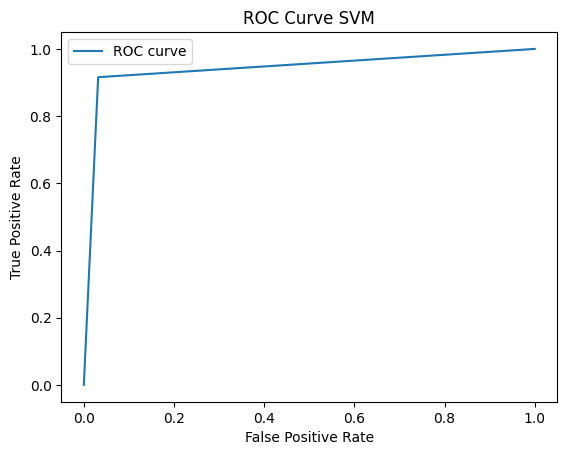

In [313]:
plt.plot(fpr2, tpr2, label='ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve SVM')
plt.legend()
plt.show()

In [314]:
from sklearn.metrics import confusion_matrix , precision_score, recall_score
confu_mat = confusion_matrix(y_test, SVC_pred)
print(confu_mat)

[[2226   73]
 [  59  642]]


In [315]:
precision2 = precision_score(y_test, SVC_pred)
recall2 = recall_score(y_test, SVC_pred)
print(precision2)
print(recall2)

0.8979020979020979
0.9158345221112696


LogisticRegression

In [316]:
from sklearn import linear_model
reg = linear_model.LogisticRegression(C=0.1,max_iter=300,solver="liblinear",penalty="l2")
reg.fit(X_train,y_train)


LogisticRegression(C=0.1, max_iter=300, solver='liblinear')

In [317]:
lr = reg.predict(X_test)
num_folds = 10
kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)
cross_val_results = cross_val_score(reg, X_test, y_test, cv=kf)
   
print(f'Cross-Validation Results (Accuracy): {cross_val_results}')
print(f'Mean Accuracy: {cross_val_results.mean()}')
from sklearn.metrics import accuracy_score
accuracy_score(y_test,lr )

Cross-Validation Results (Accuracy): [0.80666667 0.71       0.78666667 0.79333333 0.77       0.75666667
 0.76       0.78       0.78333333 0.71333333]
Mean Accuracy: 0.766


0.7783333333333333

In [318]:
from sklearn.metrics import f1_score, roc_curve, auc
f1 = f1_score(y_test, lr)
print(f1)

0.374412041392286


0.6064898898547343


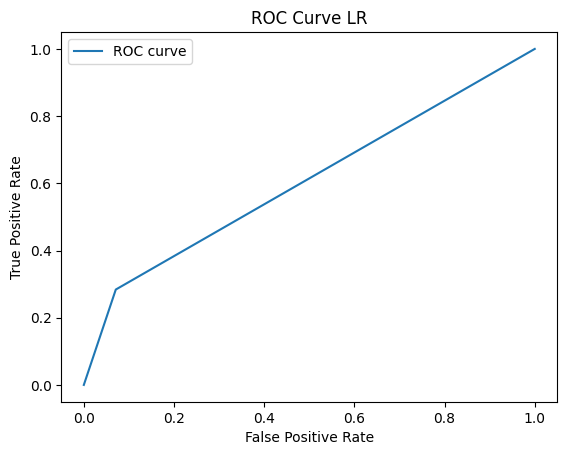

In [319]:
fpr3, tpr3, thresholds3 = roc_curve(y_test, lr)

# Calculate AUC
roc_auc3 = auc(fpr3, tpr3)
print(roc_auc3)
plt.plot(fpr3, tpr3, label='ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve LR')
plt.legend()
plt.show()

In [320]:
from sklearn.metrics import confusion_matrix , precision_score, recall_score
confu_mat = confusion_matrix(y_test, lr)
confu_mat

array([[2136,  163],
       [ 502,  199]], dtype=int64)

In [321]:
precision3 = precision_score(y_test, lr)
recall3 = recall_score(y_test, lr)
print(precision3)
print(recall3)

0.5497237569060773
0.2838801711840228


NAIVE BAYES


In [322]:
from sklearn.naive_bayes import GaussianNB
model_nv = GaussianNB()
model_nv.fit(X_train, y_train)

train_Pred = model_nv.predict(X_test)
num_folds = 10
kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)
cross_val_results = cross_val_score(model_nv, X_test, y_test, cv=kf)
   
print(f'Cross-Validation Results (Accuracy): {cross_val_results}')
print(f'Mean Accuracy: {cross_val_results.mean()}')
from sklearn.metrics import accuracy_score
accuracy_score(y_test,train_Pred )

Cross-Validation Results (Accuracy): [0.81       0.74       0.75       0.78333333 0.72666667 0.74333333
 0.76       0.80666667 0.79333333 0.79      ]
Mean Accuracy: 0.7703333333333332


0.8016666666666666

In [323]:
from sklearn.metrics import confusion_matrix , precision_score, recall_score
confu_mat = confusion_matrix(y_test, train_Pred)
confu_mat

array([[1860,  439],
       [ 156,  545]], dtype=int64)

In [324]:
precision4 = precision_score(y_test, train_Pred)
recall4 = recall_score(y_test, train_Pred)
print(precision4)
print(recall4)

0.5538617886178862
0.7774607703281027


In [325]:
from sklearn.metrics import f1_score, roc_curve, auc
f1 = f1_score(y_test, train_Pred)
print(f1)

0.6468842729970327


0.793254091123164


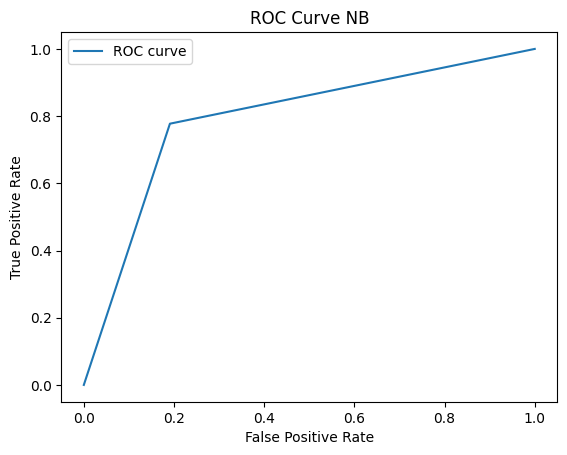

In [326]:
fpr4, tpr4, thresholds4 = roc_curve(y_test, train_Pred)

# Calculate AUC
roc_auc4 = auc(fpr4, tpr4)
print(roc_auc4)
plt.plot(fpr4, tpr4, label='ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve NB')
plt.legend()
plt.show()

In [327]:
X_test.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,low,medium
1670,0.44,0.57,2,141,3,0,0,False,True
13378,0.55,0.96,3,194,3,0,0,False,True
10233,0.72,0.67,5,210,2,0,0,False,True
4719,0.96,0.75,4,177,2,0,0,True,False
7003,0.96,0.54,3,198,3,0,0,True,False


In [328]:
X_test[:1]

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,low,medium
1670,0.44,0.57,2,141,3,0,0,False,True


In [329]:
model.predict(X_test[:1])

array([1], dtype=int64)

In [330]:
df1.loc[1670]

empid                      1671
satisfaction_level         0.44
last_evaluation            0.57
number_project                2
average_montly_hours        141
time_spend_company            3
Work_accident                 0
promotion_last_5years         0
salary                   medium
left                          1
Name: 1670, dtype: object

In [331]:
#Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,predict)
cm

array([[2285,   14],
       [  48,  653]], dtype=int64)

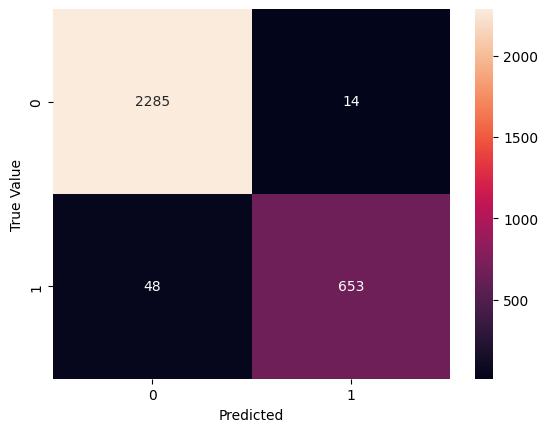

In [342]:
#plot the graph
from matplotlib import pyplot as plt
import seaborn as sn
sn.heatmap(cm,fmt="d", annot=True)
plt.xlabel('Predicted')
plt.ylabel('True Value')
plt.show()

<Axes: >

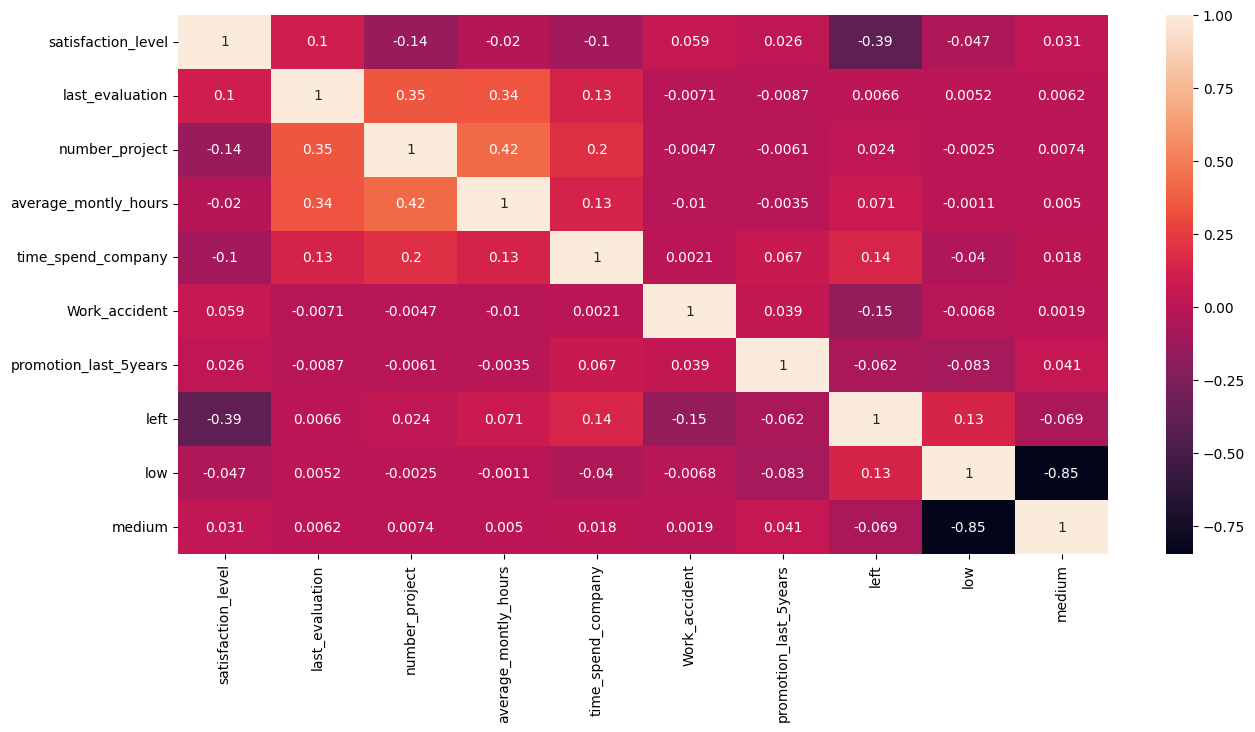

In [333]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('hr_employee_churn_data.csv')
cor_mat = df2.corr()
fig = plt.figure(figsize=(15,7))
sns.heatmap(cor_mat,annot=True)

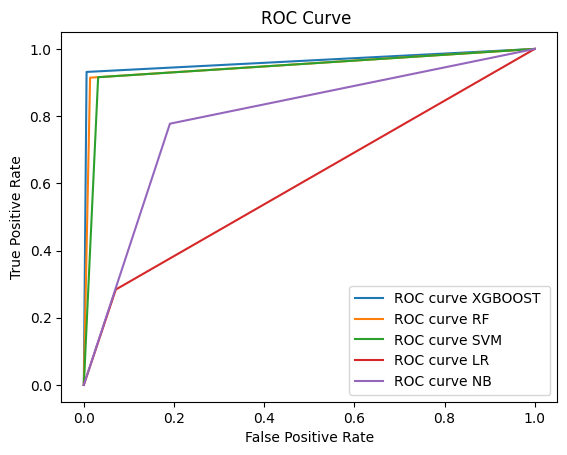

In [334]:
fpr, tpr, thresholds = roc_curve(y_test, predict)
fpr1, tpr1, thresholds1 = roc_curve(y_test, forest_pred)
fpr2, tpr2, thresholds2 = roc_curve(y_test, SVC_pred)
fpr3, tpr3, thresholds3 = roc_curve(y_test, lr)
fpr4, tpr4, thresholds4 = roc_curve(y_test, train_Pred)

# Calculate AUC
roc_auc = auc(fpr, tpr)
roc_auc1 = auc(fpr1, tpr1)
roc_auc2 = auc(fpr2, tpr2)
roc_auc3 = auc(fpr3, tpr3)
roc_auc4 = auc(fpr4, tpr4)

plt.plot(fpr, tpr, label='ROC curve XGBOOST ')
plt.plot(fpr1, tpr1, label='ROC curve RF ')
plt.plot(fpr2, tpr2, label='ROC curve SVM ')
plt.plot(fpr3, tpr3, label='ROC curve LR ')
plt.plot(fpr4, tpr4, label='ROC curve NB ')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve ')
#plt.plot([0, 1], [0, 1])

plt.legend()
plt.show()

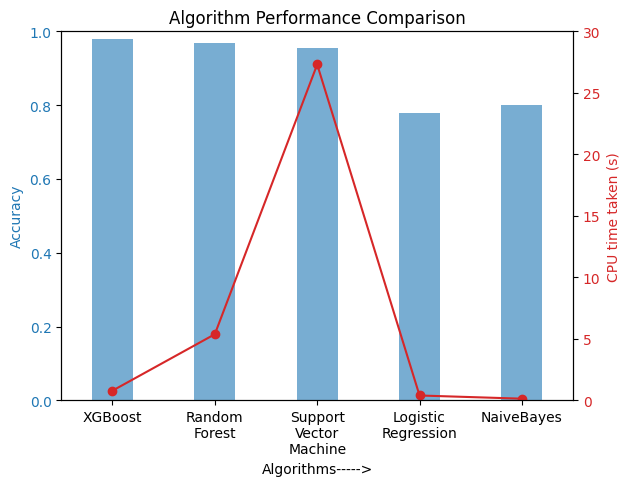

In [335]:
import matplotlib.pyplot as plt
import numpy as np

# Data
algorithms = ['XGBoost', 'Random\nForest', 'Support\nVector\nMachine', 'Logistic\nRegression', 'NaiveBayes']
accuracy = [0.979, 0.969, 0.956, 0.778, 0.801]
cpu_time = [0.785, 5.376, 27.316, 0.393, 0.134]

x = np.arange(len(algorithms))  # the label locations
width = 0.4  # the width of the bars

fig, ax1 = plt.subplots()

color = 'tab:blue'
ax1.set_xlabel('Algorithms----->')
ax1.set_ylabel('Accuracy', color=color)
bars = ax1.bar(x, accuracy, width, color=color, alpha=0.6)
ax1.tick_params(axis='y', labelcolor=color)
ax1.set_ylim(0, 1)
ax1.set_xticks(x)
ax1.set_xticklabels(algorithms)
ax1.set_xlim(-0.5, len(algorithms) - 0.5)

ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('CPU time taken (s)', color=color)
ax2.plot(x, cpu_time, color=color, marker='o')
ax2.tick_params(axis='y', labelcolor=color)
ax2.set_ylim(0, 30)

fig.tight_layout()
plt.title('Algorithm Performance Comparison')
plt.show()


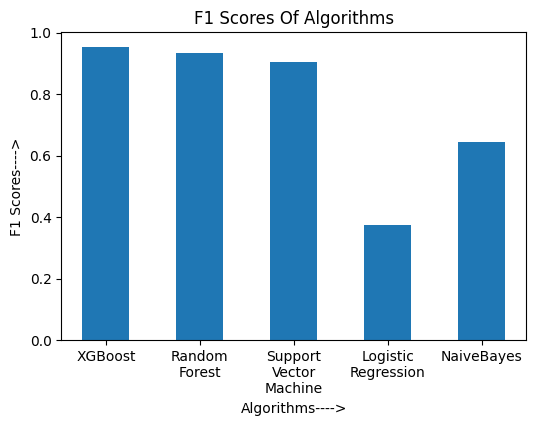

In [336]:
import numpy as np
import matplotlib.pyplot as plt 


# creating the dataset
data = {'XGBoost':0.954, 'Random\nForest':0.933, 'Support\nVector\nMachine':0.906, 
		'Logistic\nRegression':0.374,'NaiveBayes':0.646}
courses = list(data.keys())
values = list(data.values())

fig = plt.figure(figsize = (6, 4))

# creating the bar plot
plt.bar(courses, values, color ='tab:blue', 
		width = 0.5)

plt.xlabel("Algorithms---->")
plt.ylabel("F1 Scores---->")
plt.title("F1 Scores Of Algorithms")
plt.show()

In [337]:
predict = model_xgb.predict_proba(X_test)[:, 1]
forest_pred = lm2.predict_proba(X_test)[:, 1]
SVC_pred = model.decision_function(X_test)
lr = reg.predict_proba(X_test)[:, 1]
train_Pred = model_nv.predict_proba(X_test)[:, 1]


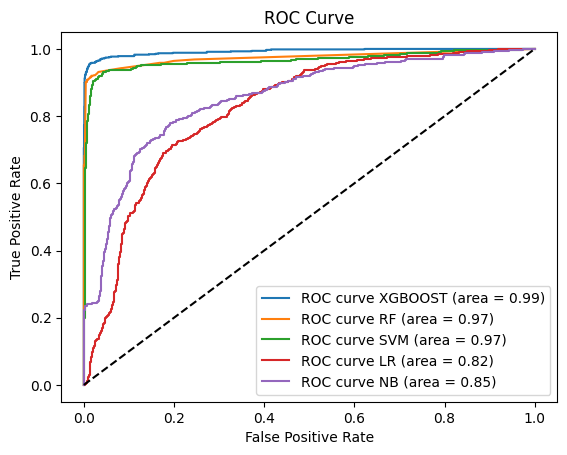

In [338]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Assuming you have the prediction probabilities
# Replace `predict`, `forest_pred`, `SVC_pred`, `lr`, `train_Pred` with their respective probability predictions

# Calculate ROC curves
fpr, tpr, thresholds = roc_curve(y_test, predict)
fpr1, tpr1, thresholds1 = roc_curve(y_test, forest_pred)
fpr2, tpr2, thresholds2 = roc_curve(y_test, SVC_pred)
fpr3, tpr3, thresholds3 = roc_curve(y_test, lr)
fpr4, tpr4, thresholds4 = roc_curve(y_test, train_Pred)

# Calculate AUC
roc_auc = auc(fpr, tpr)
roc_auc1 = auc(fpr1, tpr1)
roc_auc2 = auc(fpr2, tpr2)
roc_auc3 = auc(fpr3, tpr3)
roc_auc4 = auc(fpr4, tpr4)

# Plot ROC curves
plt.plot(fpr, tpr, label=f'ROC curve XGBOOST (area = {roc_auc:.2f})')
plt.plot(fpr1, tpr1, label=f'ROC curve RF (area = {roc_auc1:.2f})')
plt.plot(fpr2, tpr2, label=f'ROC curve SVM (area = {roc_auc2:.2f})')
plt.plot(fpr3, tpr3, label=f'ROC curve LR (area = {roc_auc3:.2f})')
plt.plot(fpr4, tpr4, label=f'ROC curve NB (area = {roc_auc4:.2f})')

# Plot the diagonal line for random performance
plt.plot([0, 1], [0, 1], 'k--')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='best')
plt.show()


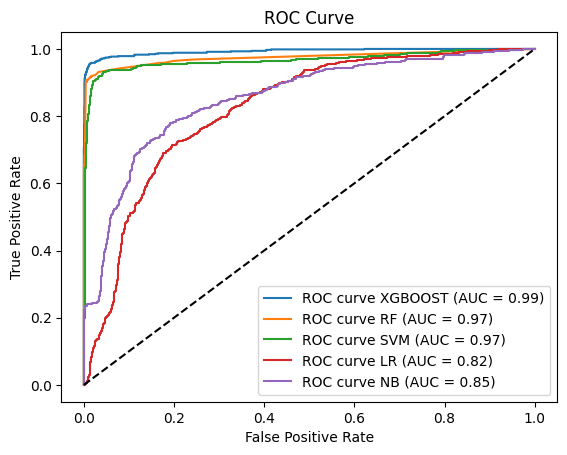

In [339]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Assuming you have the prediction probabilities for each model
# Replace `predict_prob`, `forest_pred_prob`, `SVC_pred_prob`, `lr_prob`, `train_Pred_prob` 
# with the probability predictions for the positive class from each model

# Calculate ROC curves
fpr, tpr, thresholds = roc_curve(y_test, predict)
fpr1, tpr1, thresholds1 = roc_curve(y_test, forest_pred)
fpr2, tpr2, thresholds2 = roc_curve(y_test, SVC_pred)
fpr3, tpr3, thresholds3 = roc_curve(y_test, lr)
fpr4, tpr4, thresholds4 = roc_curve(y_test, train_Pred)

# Calculate AUC
roc_auc = auc(fpr, tpr)
roc_auc1 = auc(fpr1, tpr1)
roc_auc2 = auc(fpr2, tpr2)
roc_auc3 = auc(fpr3, tpr3)
roc_auc4 = auc(fpr4, tpr4)

# Plot ROC curves
plt.plot(fpr, tpr, label=f'ROC curve XGBOOST (AUC = {roc_auc:.2f})')
plt.plot(fpr1, tpr1, label=f'ROC curve RF (AUC = {roc_auc1:.2f})')
plt.plot(fpr2, tpr2, label=f'ROC curve SVM (AUC = {roc_auc2:.2f})')
plt.plot(fpr3, tpr3, label=f'ROC curve LR (AUC = {roc_auc3:.2f})')
plt.plot(fpr4, tpr4, label=f'ROC curve NB (AUC = {roc_auc4:.2f})')

# Plot the diagonal line for random performance
plt.plot([0, 1], [0, 1], 'k--')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='best')
plt.show()


In [16]:
import pandas as pd
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
import joblib

# Load data
df = pd.read_csv('hr_employee_churn_data.csv')

# Example of preprocessing and feature engineering
# Assuming 'salary' is categorical and needs to be encoded
df = pd.get_dummies(df, columns=['salary'], drop_first=True)

# Define features and target
X = df.drop('left', axis=1)  # Replace 'left' with the actual target column name
y = df['left']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model = XGBClassifier(subsample= 0.6,n_estimators= 100,min_child_weight= 1,max_depth= 5,learning_rate= 0.1,gamma= 0.5,colsample_bytree= 1.0)
model.fit(X_train, y_train)

# Save model
joblib.dump(model, 'employee_churn_model.joblib')

print("Model trained and saved successfully!")


Model trained and saved successfully!


In [27]:
import tkinter as tk
from tkinter import messagebox
import joblib
import numpy as np

# Load the trained model
model = joblib.load('employee_churn_model.joblib')

# Function to make predictions
def predict_churn():
    try:
        # Collect input data from entry fields (modify according to your feature set)
        input_data = np.array([[
            float(entry_emp_id.get()),
            float(entry_satisfaction_level.get()),
            float(entry_last_evaluation.get()),
            int(entry_number_project.get()),
            float(entry_average_montly_hours.get()),
            int(entry_time_spend_company.get()),
            int(entry_work_accident.get()),
            int(entry_promotion_last_5years.get()),
            int(entry_salary_low.get()),
            int(entry_salary_medium.get())
        ]])

        # Make prediction
        prediction = model.predict(input_data)
        
        # Show prediction result
        result = 'Left(1)' if prediction[0] == 1 else 'Stay(0)'
        messagebox.showinfo('Prediction Result', f'The employee is predicted to: {result}')
    except Exception as e:
        messagebox.showerror('Error', str(e))

# Create tkinter window
root = tk.Tk()
root.title('Employee Churn Prediction')

# Create input fields for features
tk.Label(root, text='emp id').grid(row=0, column=0)
entry_emp_id = tk.Entry(root)
entry_emp_id.grid(row=0, column=1)

tk.Label(root, text='Satisfaction Level').grid(row=1, column=0)
entry_satisfaction_level = tk.Entry(root)
entry_satisfaction_level.grid(row=1, column=1)

tk.Label(root, text='Last Evaluation').grid(row=2, column=0)
entry_last_evaluation = tk.Entry(root)
entry_last_evaluation.grid(row=2, column=1)

tk.Label(root, text='Number of Projects').grid(row=3, column=0)
entry_number_project = tk.Entry(root)
entry_number_project.grid(row=3, column=1)

tk.Label(root, text='Average Monthly Hours').grid(row=4, column=0)
entry_average_montly_hours = tk.Entry(root)
entry_average_montly_hours.grid(row=4, column=1)

tk.Label(root, text='Time Spent at Company').grid(row=5, column=0)
entry_time_spend_company = tk.Entry(root)
entry_time_spend_company.grid(row=5, column=1)

tk.Label(root, text='Work Accident (0 or 1)').grid(row=6, column=0)
entry_work_accident = tk.Entry(root)
entry_work_accident.grid(row=6, column=1)

tk.Label(root, text='Promotion in Last 5 Years (0 or 1)').grid(row=7, column=0)
entry_promotion_last_5years = tk.Entry(root)
entry_promotion_last_5years.grid(row=7, column=1)

tk.Label(root, text='Salary Low (0 or 1)').grid(row=8, column=0)
entry_salary_low = tk.Entry(root)
entry_salary_low.grid(row=8, column=1)

tk.Label(root, text='Salary Medium (0 or 1)').grid(row=9, column=0)
entry_salary_medium = tk.Entry(root)
entry_salary_medium.grid(row=9, column=1)

# Prediction button
predict_button = tk.Button(root, text='Predict', command=predict_churn)
predict_button.grid(row=11, column=0, columnspan=5)

# Run the application
root.mainloop()

In [6]:
import joblib

# Load the trained model
model = joblib.load('employee_churn_model.joblib')

# Inspect the features the model expects
expected_features = model.feature_names_in_
print(expected_features)


['empid' 'satisfaction_level' 'last_evaluation' 'number_project'
 'average_montly_hours' 'time_spend_company' 'Work_accident'
 'promotion_last_5years' 'salary_low' 'salary_medium']
